# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Loading data

In [21]:
data <- read.csv("https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv")

head(data)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,NA,NA,NA,NA,Pork,6,High
2,2,35.48,38.56,0.66,0.92,Potato,4,High
3,3,914.28,42.68,3.09,2.88,Breakfast,1,NA
4,4,97.03,30.56,38.63,0.02,Beverages,4,High
5,5,27.05,1.85,0.80,0.53,Beverages,4,NA
6,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


# Data Validation

## Overview of the Dataset

In [22]:
print("Dimension of Data")
dim(data)
print("Columns' names")
names(data)

[1] "Dimension of Data"


[1] 947   8

[1] "Columns' names"


[1] "recipe"       "calories"     "carbohydrate" "sugar"        "protein"     
[6] "category"     "servings"     "high_traffic"

The dataset contains 947 rows and 8 columns. The columns are: recipe, calories, carbohydrate, sugar, protein, category, servings, and high_traffic, as described in the 'Data Information' section of the instruction.

### Recipe Column

In [23]:
print("Type of data")
class(data$recipe)
print("Number of missing values")
sum(is.na(data$recipe))
print("Number of duplicated data")
sum(duplicated(data$recipe))

[1] "Type of data"


[1] "integer"

[1] "Number of missing values"


[1] 0

[1] "Number of duplicated data"


[1] 0

The instruction states that the 'recipe' column contains a unique identifier for each recipe and that its type is numeric. As expected, the column is indeed numeric, contains no missing values, and all entries are unique.

### Calories Columns

In [24]:
print("Type of data")
class(data$calories)
print("Number of missing values")
sum(is.na(data$calories))
print("Proportion od missing values")
sum(is.na(data$calories))/dim(data)[1]

[1] "Type of data"


[1] "numeric"

[1] "Number of missing values"


[1] 52

[1] "Proportion od missing values"


[1] 0.05491024

As expected, the 'calories' column contains numeric data. There are 52 entries with missing values, which is about 5% of all observations.

### Carbohydrate column

In [25]:
print("Type of data")
class(data$carbohydrate)
print("Number of missing values")
sum(is.na(data$carbohydrate))
print("Proportion od missing values")
sum(is.na(data$carbohydrate))/dim(data)[1]

[1] "Type of data"


[1] "numeric"

[1] "Number of missing values"


[1] 52

[1] "Proportion od missing values"


[1] 0.05491024

Again as expected, the 'carbohydrate' column contains numeric data. There are 52 entries with missing values, which is about 5% of all observations.

### Sugar column

In [26]:
print("Type of data")
class(data$sugar)
print("Number of missing values")
sum(is.na(data$sugar))
print("Proportion od missing values")
sum(is.na(data$sugar))/dim(data)[1]

[1] "Type of data"


[1] "numeric"

[1] "Number of missing values"


[1] 52

[1] "Proportion od missing values"


[1] 0.05491024

Again as expected, the 'sugar' column contains numeric data. There are 52 entries with missing values, which is about 5% of all observations.

### Protein columns

In [27]:
print("Type of data")
class(data$protein)
print("Number of missing values")
sum(is.na(data$protein))
print("Proportion od missing values")
sum(is.na(data$protein))/dim(data)[1]

[1] "Type of data"


[1] "numeric"

[1] "Number of missing values"


[1] 52

[1] "Proportion od missing values"


[1] 0.05491024

Again as expected, the 'protein' column contains numeric data. There are 52 entries with missing values, which is about 5% of all observations.

### Category column

In [28]:
print("Type of data")
class(data$category)
print("Number of missing values")
sum(is.na(data$category))
print("Observed categories")
unique(data$category)

[1] "Type of data"


[1] "character"

[1] "Number of missing values"


[1] 0

[1] "Observed categories"


[1] "Pork"           "Potato"         "Breakfast"      "Beverages"     
 [5] "One Dish Meal"  "Chicken Breast" "Lunch/Snacks"   "Chicken"       
 [9] "Vegetable"      "Meat"           "Dessert"

According to the instruction, the 'category' column should contain a character variable with ten categories (Lunch/Snacks, Beverages, Potato, Vegetable, Meat, Chicken, Pork, Dessert, Breakfast, One Dish Meal). In reality, it contains eleven categories (Pork, Potato, Breakfast, Beverages, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat, Dessert).
The additional and unexpected category is 'Chicken Breast'. While it can be considered a subcategory of 'Chicken', I recoded this value to 'Chicken'.

In [29]:
data$category <- ifelse(data$category == 'Chicken Breast', 'Chicken', data$category)

### Servings columns

In [30]:
print("Type of data")
class(data$servings)
print("Number of missing values")
sum(is.na(data$servings))
print("Proportion od missing values")
sum(is.na(data$servings))/dim(data)[1]
print("Observed categories")
unique(data$servings)

[1] "Type of data"


[1] "character"

[1] "Number of missing values"


[1] 0

[1] "Proportion od missing values"


[1] 0

[1] "Observed categories"


[1] "6"            "4"            "1"            "2"            "4 as a snack"
[6] "6 as a snack"

The 'servings' column contains numeric data as expected with no missing values. Values '4 as a snack' and '6 as a snack' were recoded to '4' and '6', respectively.
Variable was transformed to numeric data.

In [31]:
library(stringr)
data$servings = as.numeric(str_remove(data$servings, pattern = " as a snack"))

### High traffic column

In [32]:
print("Type of data")
class(data$high_traffic)
print("Number of missing values")
sum(is.na(data$high_traffic))
print("Proportion od missing values")
sum(is.na(data$high_traffic))/dim(data)[1]

[1] "Type of data"


[1] "character"

[1] "Number of missing values"


[1] 373

[1] "Proportion od missing values"


[1] 0.3938754

The 'high_traffic' column contains a character variable, as described in the instruction. This means that a value is present when the traffic was high, and missing when it was not. I assume there are no errors in this logic. To simplify the analysis, I recoded the values: 'high' was recoded to 1, and missing values to 0.

In [33]:
data$high_traffic <- ifelse(is.na(data$high_traffic), 0, 1)

In [34]:
table(data$high_traffic)/dim(data)[1]


        0         1 
0.3938754 0.6061246 

I consider the proportion 4:6 as balanced, so there is no need to perform additional sampling.

### Missing values

In [35]:
dim(na.omit(data))[1] == dim(data)[1] - 52

[1] TRUE

In [36]:
data <- na.omit(data)
table(data$high_traffic)/dim(data)[1]


        0         1 
0.4022346 0.5977654 

Removing all rows with missing values results in a dataset that is exactly 52 observations smaller, which means that the missing values across all columns occur in the same rows. In other words, if there is one missing value in a row, all other values in that row are missing as well (if they were detected as missing).
Removing these rows slightly improves the proportion of 'high' values in the 'high_traffic' column.

# Exploratory Analysis

In [39]:
library(dplyr)
library(tidyr)

data %>%
  pivot_longer(
    cols = c(calories, carbohydrate, sugar, protein),
    names_to = "variable",
    values_to = "value") %>%
  group_by(variable) %>%
  summarize(mean = mean(value),
			sd = sd(value),
		    min = min(value),
		    max = max(value),
		    vari = sd/mean,
		    q003 = quantile(value, 0.03),
		    q097 = quantile(value, 0.97))

variable,mean,sd,min,max,vari,q003,q097
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
calories,435.939196,453.02100,0.14,3633.16,1.039184,12.2076,1570.2464
carbohydrate,35.069676,43.94903,0.03,530.42,1.253192,0.9620,146.4666
protein,24.149296,36.36974,0.00,363.36,1.506037,0.1300,112.8578
sugar,9.046547,14.67918,0.01,148.75,1.622627,0.2082,48.4476


In [40]:
library(dplyr)

outliers = 0.97
data %>%
   filter(calories < quantile(calories, outliers),
		  carbohydrate < quantile(carbohydrate, outliers),
		  sugar < quantile(sugar, outliers),
		  protein < quantile(protein, outliers)) -> data_cleaned
data_cleaned %>%   
   pivot_longer(
    cols = c(calories, carbohydrate, sugar, protein),
    names_to = "variable",
    values_to = "value") %>%
   group_by(variable) %>%
   summarize(mean = mean(value),
			sd = sd(value),
		    max = max(value),
		    vari = sd/mean,
		    q098 = quantile(value, 0.98)) -> summary_data

summary_data
mean(summary_data$vari)
sd(summary_data$vari)



variable,mean,sd,max,vari,q098
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
calories,387.027016,352.873525,1568.00,0.9117542,1331.492
carbohydrate,29.444159,28.987619,145.32,0.9844947,115.360
protein,19.426372,23.246641,112.64,1.1966538,88.800
sugar,7.148243,8.473039,48.21,1.1853317,38.414


[1] 1.069559

[1] 0.1434046

In [41]:
dim(data_cleaned)

[1] 791   8

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


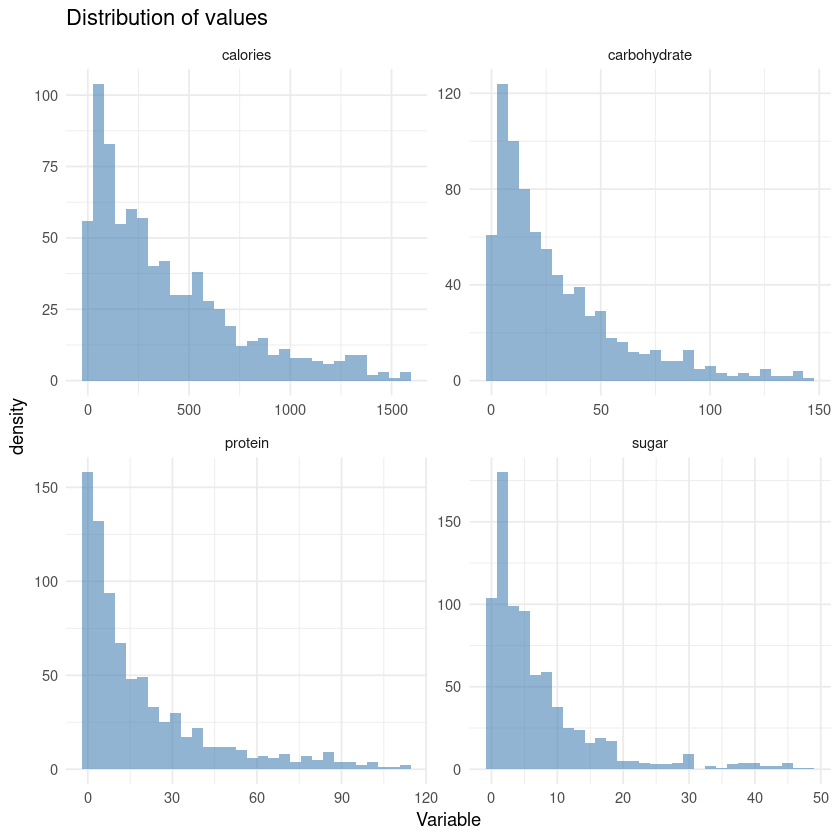

In [42]:
library(ggplot2)
data_cleaned %>%
  pivot_longer(
    cols = c(calories, carbohydrate, sugar, protein),
    names_to = "variable",
    values_to = "value") %>%
  ggplot(aes(x = value)) +
	geom_histogram(fill = "steelblue", alpha = 0.6) +
    facet_wrap(~ variable, scales = "free") +
    labs(x = "Variable", y = "density", title = "Distribution of values") +
    theme_minimal()

The data in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns are numeric and continuous, so I visualized them using histograms.
A visual inspection of the distributions clearly shows right-skewness, indicating that the data are not normally distributed.
By analyzing summary statistics — such as the mean, standard deviation, minimum, maximum, coefficient of variation, and quantiles—I identified some outliers. I decided to remove the top 3% of values in each column. After this adjustment, the coefficient of variation is consistently close to 1 in each case and a number of observation is still guite high.

In [43]:
names(data_cleaned)

[1] "recipe"       "calories"     "carbohydrate" "sugar"        "protein"     
[6] "category"     "servings"     "high_traffic"


	Chi-squared test for given probabilities

data:  table(data_cleaned$category)
X-squared = 78.039, df = 9, p-value = 3.958e-13


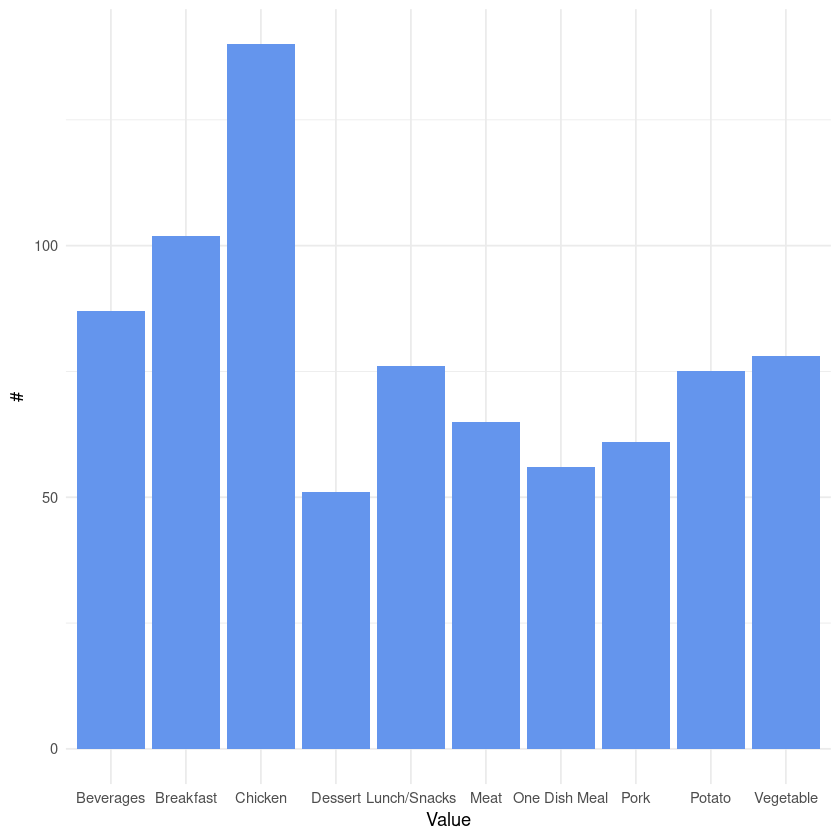

In [44]:
library(ggplot2)
library(tidyr)
library(dplyr)

data_cleaned %>%
  select(category) %>%
  ggplot(aes(x = category)) +
  geom_bar(fill = "cornflowerblue") +
  labs(x = "Value", y = "#") +
  theme_minimal()

chisq.test(table(data_cleaned$category))


In [45]:
table(data_cleaned$servings)
chisq.test(table(data_cleaned$servings))


  1   2   4   6 
149 151 328 163 


	Chi-squared test for given probabilities

data:  table(data_cleaned$servings)
X-squared = 114.97, df = 3, p-value < 2.2e-16


The distributions of both 'category' and 'servings' are not uniform.
In the case of 'category', there are significantly more recipes categorized as 'Chicken'. For 'servings', the majority of recipes have four servings.
Both distributions could be seen as potential issues, but in my opinion, they should be left unchanged. It seems intuitive that four servings is a practical default—suitable for a family with children or a couple over two days.
Similarly, chicken-based meals are likely the most popular, as chicken is a widely consumed type of meat.

In [46]:
names(data_cleaned)

[1] "recipe"       "calories"     "carbohydrate" "sugar"        "protein"     
[6] "category"     "servings"     "high_traffic"

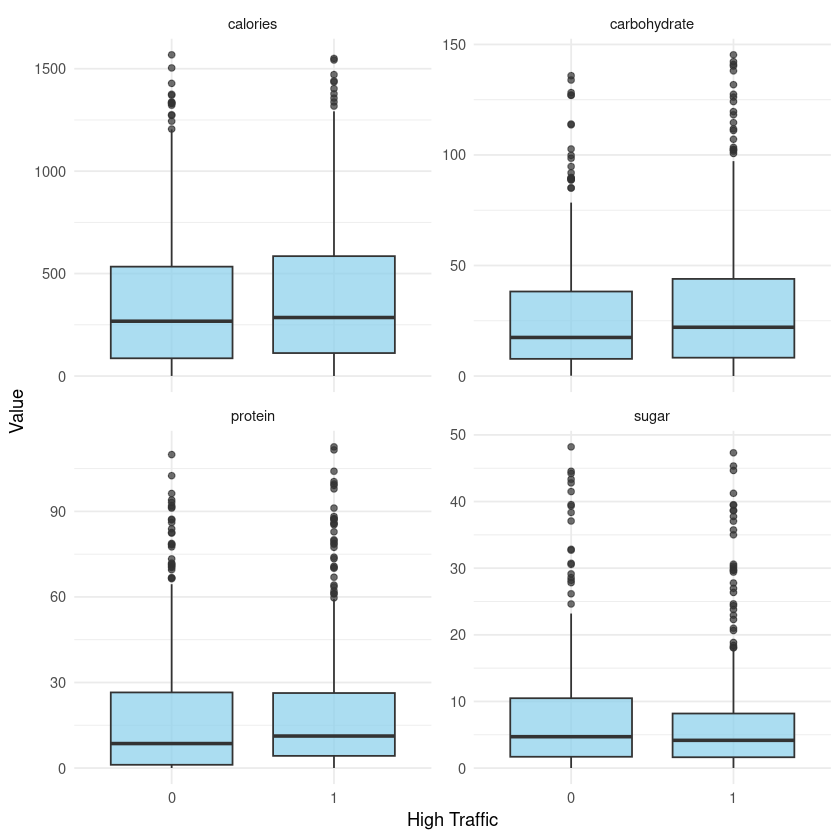

In [47]:
data_cleaned %>%
  pivot_longer(
    cols = c(calories, carbohydrate, sugar, protein),
    names_to = "variable",
    values_to = "value"
  ) %>%
ggplot(aes(x = as.factor(high_traffic), y = value)) +
  geom_boxplot(fill = "skyblue", alpha = 0.7) +
  facet_wrap(~ variable, scales = "free_y") +
  labs(
    x = "High Traffic",
    y = "Value") +
  theme_minimal()

In [48]:
library(dplyr)

vars <- c("calories", "carbohydrate", "sugar", "protein")

results <- sapply(vars, function(var) {
  test <- wilcox.test(data[[var]] ~ data$high_traffic)
  test$p.value
})

test_results <- data.frame(
  Variable = vars,
  `p-value` = round(results, 4),
  significance = ifelse(results < 0.05, "Yes", "No")
)

test_results


,Variable,p.value,significance
,<chr>,<dbl>,<chr>
calories,calories,0.0386,Yes
carbohydrate,carbohydrate,0.0525,No
sugar,sugar,0.0337,Yes
protein,protein,0.0004,Yes


Based on boxplot analysis, it appears that calories, carbohydrate, sugar, and protein have little or no impact on webpage traffic. However, statistical tests indicate that calories, sugar, and protein do have a significant effect.
By interpreting these results together, we can conclude that the impact of these variables is minor.

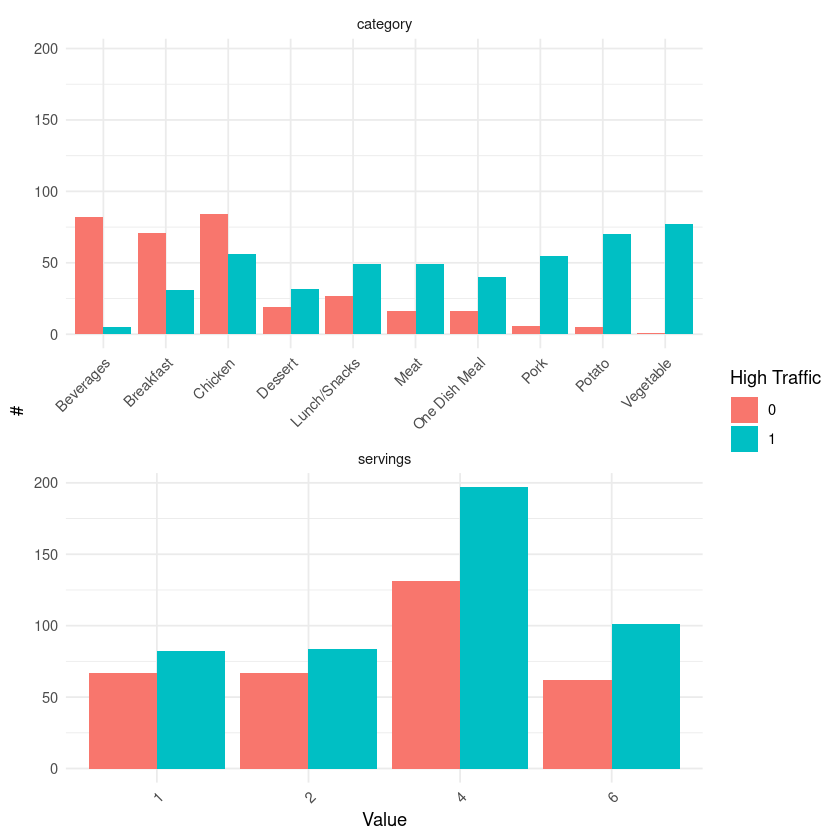

In [49]:
data_cleaned %>%
  mutate(servings = as.character(servings)) %>%
  select(category, servings, high_traffic) %>%
  pivot_longer(cols = c(category, servings), names_to = "variable", values_to = "value") %>%
  mutate(
    value = as.factor(value),
    high_traffic = as.factor(high_traffic)
  ) %>% ggplot(aes(x = value, fill = high_traffic)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ variable, scales = "free_x", ncol = 1) +
  labs(
    x = "Value",
    y = "#",
    fill = "High Traffic") +
  theme_minimal() +
theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

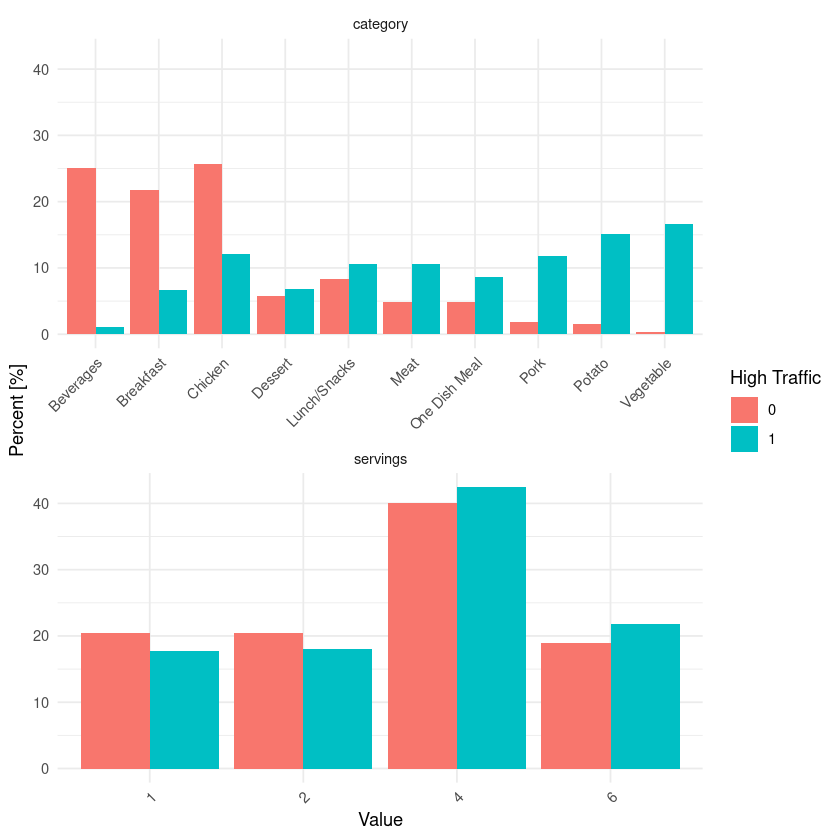

In [50]:
library(dplyr)
library(tidyr)
library(ggplot2)

data_cleaned %>%
  mutate(servings = as.character(servings)) %>%
  select(category, servings, high_traffic) %>%
  pivot_longer(cols = c(category, servings),
               names_to = "variable",
               values_to = "value") %>%
  mutate(
    value = as.factor(value),
    high_traffic = as.factor(high_traffic)
  ) %>%
  group_by(variable, value, high_traffic) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(variable, high_traffic) %>%
  mutate(percent = count / sum(count) * 100) %>%
ggplot(aes(x = value, y = percent, fill = high_traffic)) +
  geom_col(position = "dodge") +
  facet_wrap(~ variable, ncol = 1, scales = "free_x") +
  labs(
    x = "Value",
    y = "Percent [%]",
    fill = "High Traffic") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


From the charts above, it is clear that the 'category' variable has a noticeable impact on webpage traffic. For example, almost every vegetable-based meal had high traffic, while nearly all beverages had low traffic.
As for the number of servings, as expected, the most popular meals are those with four servings.

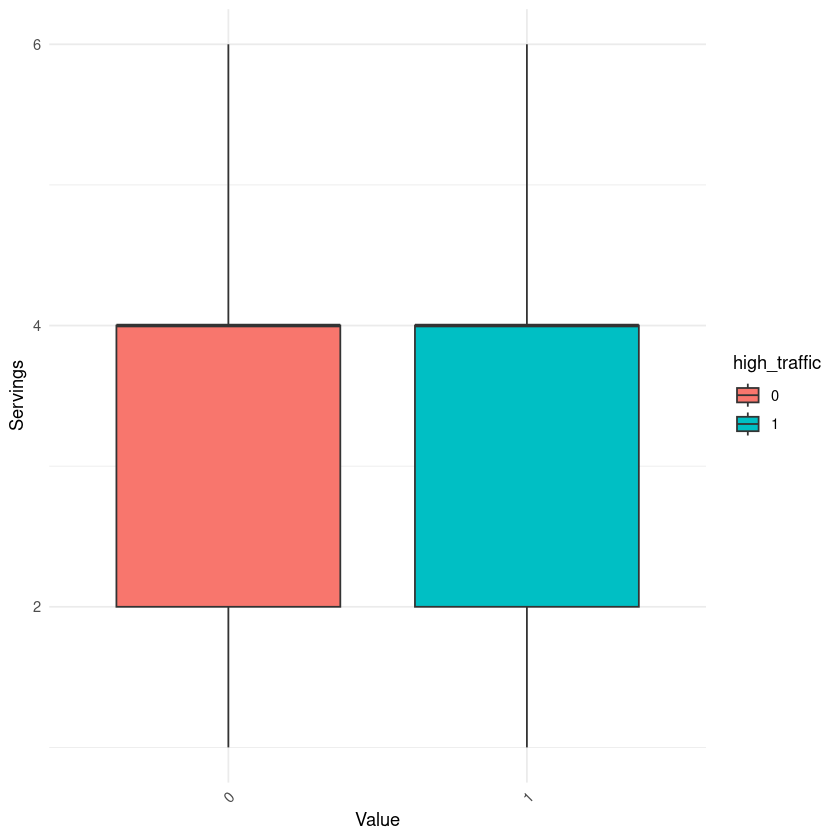

In [51]:
library(dplyr)
library(ggplot2)

data_cleaned %>%
  mutate(high_traffic = as.factor(high_traffic)) %>%
  select(servings, high_traffic) %>%
ggplot(aes(x = high_traffic, y = servings, fill = high_traffic)) +
  geom_boxplot() +
  labs(
    x = "Value",
    y = "Servings") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [52]:
wilcox.test(data_cleaned$servings ~ data_cleaned$high_traffic)


	Wilcoxon rank sum test with continuity correction

data:  data_cleaned$servings by data_cleaned$high_traffic
W = 71342, p-value = 0.1333
alternative hypothesis: true location shift is not equal to 0


The number of servings appears to have no impact on webpage traffic.

# Model Development

Since the variable high_traffic is our target and it has only two values (high traffic or not high traffic, coded as 1 and 0 respectively), this is a binary classification problem.
I am going to test two models: logistic regression and a decision tree. I suspect that logistic regression will perform better, as it often works surprisingly well in real-life binary classification tasks.

To compare the models, I will use the confusion matrix, accuracy, sensitivity, specificity, AUC, and the ROC curve.

Although I initially assumed that the classes were balanced, the actual distribution (2:3) is not perfectly balanced—yet it is also not severely imbalanced. Therefore, I decided not to apply any rebalancing techniques. Instead, I prioritized evaluation metrics that are less sensitive to moderate class imbalance, such as AUC and the ROC curve.

I decided to use 'category', 'calories', 'sugar', and 'protein' as independent variables, because previous analyses indicated that 'category' likely has the greatest effect on webpage traffic. Additionally, 'calories', 'sugar', and 'protein' showed a small but statistically significant impact.

### Train-test split

In [54]:
library(dplyr)
library(caret)
library(pROC)
library(rpart)

# train-test split
data <- data_cleaned %>% mutate(high_traffic = as.factor(high_traffic))
set.seed(123)
train_idx <- createDataPartition(data$high_traffic, p = 0.8, list = FALSE)
train <- data[train_idx, ]
test <- data[-train_idx, ]

## Logistic Regression (baseline model)

In [55]:
# Logistic regression
log_model <- glm(high_traffic ~ category + calories + sugar + protein,
                 data = train, family = binomial)
log_probs <- predict(log_model, newdata = test, type = "response")
log_preds <- ifelse(log_probs > 0.5, 1, 0)


## Decision tree (comparison model)

In [56]:
# Decision tree
tree_model <- rpart(high_traffic ~ category + calories + sugar + protein,
                    data = train, method = "class")
tree_preds <- predict(tree_model, newdata = test, type = "class")
tree_probs <- predict(tree_model, newdata = test)[, "1"]


### Model comparison

Logistic regression:
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51 17
         1 14 75
                                          
               Accuracy : 0.8025          
                 95% CI : (0.7316, 0.8617)
    No Information Rate : 0.586           
    P-Value [Acc > NIR] : 6.919e-09       
                                          
                  Kappa : 0.5958          
                                          
 Mcnemar's Test P-Value : 0.7194          
                                          
            Sensitivity : 0.7846          
            Specificity : 0.8152          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.8427          
             Prevalence : 0.4140          
         Detection Rate : 0.3248          
   Detection Prevalence : 0.4331          
      Balanced Accuracy : 0.7999          
                                          
       'Positive' Class : 0               
               

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




AUC logistic: 0.8615385
AUC tree:    0.791806

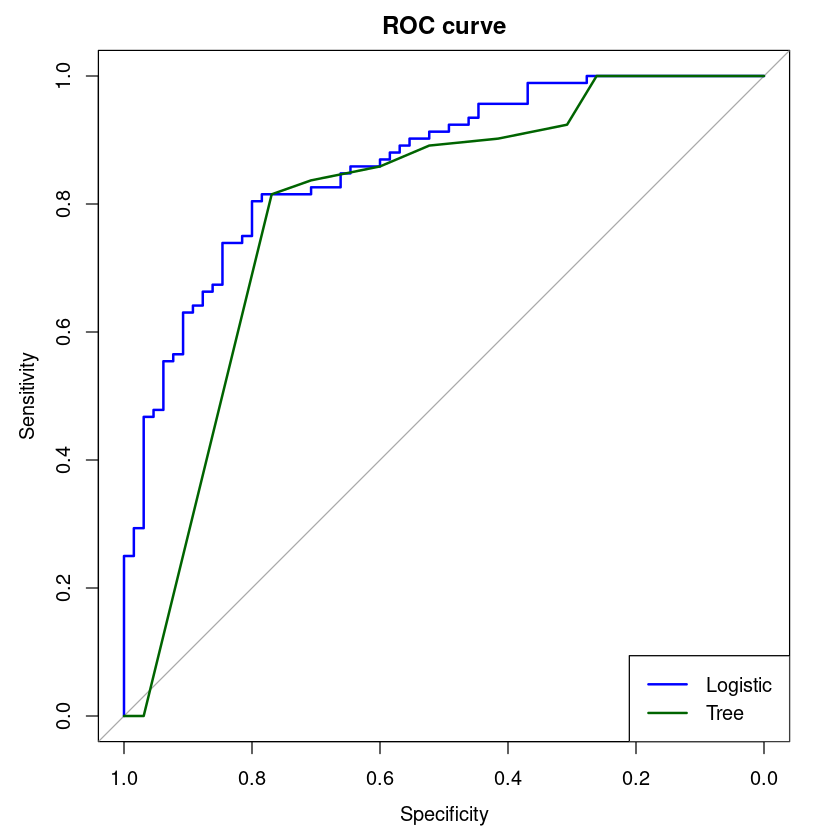

In [57]:
# 4. Confusion matrix
cat("Logistic regression:\n")
print(confusionMatrix(as.factor(log_preds), test$high_traffic))

cat("\nDecision tree:\n")
print(confusionMatrix(tree_preds, test$high_traffic))

# 5. ROC curve + AUC
roc_log <- roc(test$high_traffic, log_probs)
roc_tree <- roc(test$high_traffic, tree_probs)

plot(roc_log, col = "blue", main = "ROC curve")
lines(roc_tree, col = "darkgreen")
legend("bottomright", legend = c("Logistic", "Tree"),
       col = c("blue", "darkgreen"), lwd = 2)

cat("\nAUC logistic:", auc(roc_log))
cat("\nAUC tree:   ", auc(roc_tree))

# Model Evaluation

The accuracy of the logistic regression model is clearly higher than that of the decision tree model (0.80 > 0.75). This means that the logistic model correctly predicted more cases overall. Sensitivity is also higher for the logistic model (0.78 > 0.60), indicating that it is more effective at predicting whether a given recipe will generate high traffic.

The specificity of the logistic model is slightly lower than that of the decision tree (0.82 < 0.86), meaning the tree model is slightly better at identifying recipes that will not generate high traffic.

Since correctly identifying recipes that will generate high traffic is more important than identifying those that will not, the most important metric in this context is the AUC.

The logistic model's AUC is substantially higher (0.86 > 0.79), which means it is more effective at distinguishing which recipes should be featured on the homepage.

# Business Metrics

In [58]:
summary(log_model)


Call:
glm(formula = high_traffic ~ category + calories + sugar + protein, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8514  -0.8502   0.1896   0.8604   2.3295  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.6210487  0.4824817  -5.432 5.56e-08 ***
categoryBreakfast      1.8115226  0.5359599   3.380 0.000725 ***
categoryChicken        2.5495321  0.5326451   4.787 1.70e-06 ***
categoryDessert        2.9967266  0.5792094   5.174 2.29e-07 ***
categoryLunch/Snacks   3.4652603  0.5485110   6.318 2.66e-10 ***
categoryMeat           3.7051943  0.5853491   6.330 2.45e-10 ***
categoryOne Dish Meal  3.6641096  0.5957610   6.150 7.73e-10 ***
categoryPork           5.0767623  0.6887008   7.372 1.69e-13 ***
categoryPotato         5.5513348  0.7621667   7.284 3.25e-13 ***
categoryVegetable      6.7797156  1.1124198   6.095 1.10e-09 ***
calories              -0.0001077  0.0002747

The analysis indicated that recipes from the 'Beverages' category have little chance of generating high traffic. Recipes from categories such as 'Meat', 'Pork', and 'Potato' have a much higher likelihood. However, the best-performing category appears to be 'Vegetable'.

Calories, sugar, and protein do not significantly affect the likelihood of high traffic. However, the data suggest that, in cases of uncertainty, recipes with fewer calories, less protein, and slightly more sugar may be a better choice—possibly because such meals are perceived as slightly more appealing or tasty.

To evaluate whether the model works effectively in a business context, I recommend collecting detailed traffic data for at least one week — ideally, for a full month.
Once this data is collected, I suggest primarily selecting recipes from the 'Vegetables' or 'Potato' categories for the homepage. If such recipes are not available, 'Meat' and 'Pork' categories are also likely to significantly boost traffic.

If there are multiple recipe options within these categories, it may be beneficial to prioritize those with slightly fewer calories and protein, and slightly more sugar — although this effect is less pronounced and should be treated as a secondary consideration.

Finally, recipes from the 'Beverages' category should generally be avoided, as they are associated with low traffic and may reduce engagement when displayed on the homepage.

Remember to collect traffic data again after applying the above recommendations — ideally for at least one week, and preferably for a full month.
After this period, compare the new results with the baseline data collected beforehand.
The analysis suggests that traffic should be significantly higher after implementing these changes.

If possible, consider running an A/B test, showing some users recipes chosen manually and others based on above recommendations, to directly measure the impact of data-driven selection.

# Summary

The goal of this project was to build a model that predicts which recipes will drive high traffic to the website, supporting better decisions about which recipes to display on the homepage. Logistic regression outperformed the decision tree model, achieving 80% accuracy, 78% sensitivity, and an AUC of 0.86 — indicating strong predictive performance in identifying popular recipes.

Importantly, the results show that it is possible to design clear and actionable recommendations that do not require complex models or calculations to implement. Simple rules and category-based guidelines are sufficient to achieve meaningful improvements.

The analysis showed that recipe category has the greatest impact on traffic. Recipes in the ‘Vegetables’, ‘Potato’, ‘Meat’, and ‘Pork’ categories are most likely to attract high traffic, while ‘Beverages’ are consistently associated with low engagement. Nutritional features like calories, sugar, and protein have only minor effects.

I recommend prioritizing recipes from high-performing categories on the homepage. To assess business impact, traffic should be monitored over time — ideally both before and after applying these recommendations. If implemented, the model is expected to help increase website traffic and support subscription growth.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation